In [ ]:
import os
import pandas as pd
import numpy as np
import time
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import scatter_matrix
from importlib import reload
from sklearn.feature_selection import VarianceThreshold
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


**Data Preprocessing**

Reading datasets from github url (**Urls will expire after some time!** If the urls do not work, follow the steps below to get the new Urls)
1. Go to https://github.com/bryanwhl/facebook-comments/tree/main/Dataset
2. Go to the `Testing/TestSet/` folder.
3. For all csv files, open them as raw and copy the url to this notebook.
4. Repeat for all csv files in the `Training` folder.

Adding a new column for the type of variant

Combining columns with similar features (e.g. days)


In [ ]:
variant1 = 'https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Training/Features_Variant_1.csv?token=AOHDW7AAMZJXPYSGR6C67XDBU5ZG4'
variant2 = 'https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Training/Features_Variant_2.csv?token=AOHDW7GLE337N6ZSTDXKNNTBU5ZHA'
variant3 = 'https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Training/Features_Variant_3.csv?token=AOHDW7EKC6UB42MC5KCL7WDBU5ZHC'
variant4 = 'https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Training/Features_Variant_4.csv?token=AOHDW7CHJDGBBYCH6DAU4ELBU5ZHE'
variant5 = 'https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Training/Features_Variant_5.csv?token=AOHDW7CLL254R4A7U6KQBZ3BU5ZHI'

training_files = (variant1, variant2, variant3, variant4, variant5)

test1 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_1.csv?token=AOHDW7CAN6B62ON5WIAHP6LBU5ZLQ"
test2 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_2.csv?token=AOHDW7C2ZF4WHMYTJ6RNFEDBU5ZLU"
test3 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_3.csv?token=AOHDW7BBWTBGJ6VIBUIUWNLBU5ZLW"
test4 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_4.csv?token=AOHDW7C254EV4TWEKTG7PT3BU5ZLY"
test5 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_5.csv?token=AOHDW7AQASMAXUJDGBBRR5LBU5ZL2"
test6 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_6.csv?token=AOHDW7DQPGGSQ5AEGWXU5SLBU5ZPY"
test7 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_7.csv?token=AOHDW7AUFMFW2UMBD74XNNDBU5ZP4"
test8 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_8.csv?token=AOHDW7APTGWEN7YXPQRFRCTBU5ZP6"
test9 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_9.csv?token=AOHDW7CONSU2GPRJRW4VH33BU5ZQA"
test10 = "https://raw.githubusercontent.com/bryanwhl/facebook-comments/main/Dataset/Testing/TestSet/Test_Case_10.csv?token=AOHDW7G4NNAW7ER37MCXRVDBU5ZQC"

testing_files = (test1, test2, test3, test4, test5, test6, test7, test8, test9, test10)

COLUMNS = ("page_likes", "page_checkins", "page_talking_about", "page_category", 
           "cc1_min", "cc1_max", "cc1_average", "cc1_median", "cc1_std", 
           "cc2_min", "cc2_max", "cc2_average", "cc2_median", "cc2_std", 
           "cc3_min", "cc3_max", "cc3_average", "cc3_median", "cc3_std", 
           "cc4_min", "cc4_max", "cc4_average", "cc4_median", "cc4_std", 
           "cc5_min", "cc5_max", "cc5_average", "cc5_median", "cc5_std", 
           "cc1", "cc2", "cc3", "cc4", "cc5", "base_time", 
           "post_length", "post_share_count", "post_promotion_status", "h_local", 
           "post_published_sun", "post_published_mon", "post_published_tues", 
           "post_published_wed", "post_published_thurs", "post_published_fri", 
           "post_published_sat", "base_datetime_sun", "base_datetime_mon", 
           "base_datetime_tues", "base_datetime_wed", "base_datetime_thurs", 
           "base_datetime_fri", "base_datetime_sat", "target")


In [ ]:
# Reads data from given url, returns list of dataframes, 1 df per url
def read_data(urls):
  df_list = []
  for url in urls:
    df = pd.read_csv(url, index_col=False, names=COLUMNS)
    df_list.append(df)
  return df_list

Add new column variant type for the 5 different variants

In [ ]:
# Add a variant column based on the order of the dataframes in the dataframe list
def add_variant_column(df_list):
  for i in range(len(df_list)):
    df = df_list[i]
    df["variant-type"] = i
  return df_list

Merge the day posted (col 39 - 45) and base day (46 - 52) into 1 column and drop the rest for different variants.

1 = Sun, 2 = Mon, 3 = Tues, ..., 7 = Sat

In [ ]:
# Merge columns for Post_Day
def merge_days(df_list):
  for df in df_list:
    df["Post_Day"] = 0
    post_Day = 1
    cols = ("post_published_sun", "post_published_mon", "post_published_tues", 
            "post_published_wed", "post_published_thurs", "post_published_fri", 
            "post_published_sat")
    for col in cols:
      df.loc[df[col] == 1, 'Post_Day'] = post_Day
      post_Day += 1
  # Merge columns for Base_Day
  for df in df_list:
    df["Base_Day"] = 0
    base_Day = 1
    cols = ("base_datetime_sun", "base_datetime_mon", "base_datetime_tues", 
            "base_datetime_wed", "base_datetime_thurs", "base_datetime_fri", 
            "base_datetime_sat")
    for col in cols:
      df.loc[df[col] == 1, 'Base_Day'] = base_Day
      base_Day += 1
  cols_To_Drop = ["post_published_sun", "post_published_mon", "post_published_tues", 
                  "post_published_wed", "post_published_thurs", "post_published_fri", 
                  "post_published_sat", "base_datetime_sun", "base_datetime_mon", 
                  "base_datetime_tues", "base_datetime_wed", "base_datetime_thurs", 
                  "base_datetime_fri", "base_datetime_sat"]
  df_list2 = []
  for df in df_list:
    df.drop(cols_To_Drop, axis=1, inplace=True)
    # Rearrange columns so that target col is last
    cols = list(df.columns.values)
    cols.pop(cols.index("target"))
    df = df[cols+["target"]]
    df_list2.append(df)
    
  return df_list2

In [ ]:
def binarize_labels(df):
  df['target'] = df["target"].apply(lambda x: 1 if x > 0 else 0)
  return df

In [ ]:
def split_df(df):
  features = df.drop(['target'], axis=1)
  labels = df["target"]
  return features, labels

**Human Heuristic**
Remove columns 5-29 as they are derived features from feature 30-35

In [ ]:
def removeCols529(df):
  df.drop(df.iloc[:, 4:29], inplace = True, axis = 1)
  return df

**Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

def normalizeTrain(df):
  scaler = StandardScaler()
  array = scaler.fit_transform(df)

  return pd.DataFrame(array, columns=df.columns), scaler


def normalizeTrainTarget(df):
  array = np.array(df).reshape(-1, 1)
  scaler = StandardScaler()
  array_transformed = scaler.fit_transform(array)

  return pd.DataFrame(array_transformed, columns=["target"]), scaler


def normalizeTest(df, scaler):
  array = scaler.transform(df)

  return pd.DataFrame(array, columns=df.columns)


def normalizeTestTarget(df, scaler):
  array = np.array(df).reshape(-1, 1)
  array_transformed = scaler.transform(array)

  return pd.DataFrame(array_transformed, columns=["target"])

### Data Processing

In [ ]:
df_list = read_data(training_files)
df_list = merge_days(df_list)
df_list_2 = []
for df in df_list:
    df = binarize_labels(df)
    df = df.drop(['post_promotion_status'], 1)
    df_list_2.append(df)
df_list = df_list_2
merged_df = pd.concat(df_list)
df_list.append(merged_df) # We now have variant 1 - 5 + merged of variant 1 - 5 as the 6th element



In [ ]:
df1 = df_list[0]
df1

,page_likes,page_checkins,page_talking_about,page_category,cc1_min,cc1_max,cc1_average,cc1_median,cc1_std,cc2_min,cc2_max,cc2_average,cc2_median,cc2_std,cc3_min,cc3_max,cc3_average,cc3_median,cc3_std,cc4_min,cc4_max,cc4_average,cc4_median,cc4_std,cc5_min,cc5_max,cc5_average,cc5_median,cc5_std,cc1,cc2,cc3,cc4,cc5,base_time,post_length,post_share_count,h_local,Post_Day,Base_Day,target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,24,4,7,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,24,5,6,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,24,6,7,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,24,6,2,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,24,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,269,14,58,240,-44,56,12,1511,2,4,6,1
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,644,20,106,619,-86,53,149,1099,3,4,6,1
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,620,620,0,620,620,19,120,2962,24,4,5,1
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,629,189,440,588,-251,33,33,1383,9,4,6,1


In [ ]:
df1.describe()

,page_likes,page_checkins,page_talking_about,page_category,cc1_min,cc1_max,cc1_average,cc1_median,cc1_std,cc2_min,cc2_max,cc2_average,cc2_median,cc2_std,cc3_min,cc3_max,cc3_average,cc3_median,cc3_std,cc4_min,cc4_max,cc4_average,cc4_median,cc4_std,cc5_min,cc5_max,cc5_average,cc5_median,cc5_std,cc1,cc2,cc3,cc4,cc5,base_time,post_length,post_share_count,h_local,Post_Day,Base_Day,target
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,285.187428,22.186647,7.503724,40.474206,0.024103,268.358275,19.649686,4.921537,38.728848,1.497253,415.395297,52.631591,34.042370,63.154906,-220.046619,275.403722,2.536961,-2.020904,55.840996,55.720384,22.186647,19.649686,52.631591,2.536961,35.322035,163.652470,117.249823,23.767833,4.043737,4.045715,0.448607
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,374.441728,36.930662,21.778756,54.277774,1.981360,327.063844,31.094112,13.245799,50.846434,18.715475,472.380251,81.264281,66.153081,76.403985,281.814185,373.330611,17.544907,14.720873,73.811134,136.975705,77.124263,71.078576,128.179920,94.202974,20.916864,376.264387,945.006667,1.919829,1.945059,1.992687,0.497358
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,-204.000000,-210.500000,-288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,26.000000,1.911290,0.000000,4.109465,0.000000,26.000000,2.030303,0.000000,4.094580,0.000000,42.000000,5.218182,2.000000,7.600215,-310.000000,23.000000,-0.483221,-2.000000,5.990950,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,24.000000,2.000000,2.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,118.000000,8.437500,2.000000,17.382709,0.000000,116.000000,8.584270,1.000000,18.639984,0.000000,224.000000,21.859375,12.000000,32.368848,-92.000000,109.000000,0.273810,0.000000,25.547172,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,24.000000,4.000000,4.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,405.000000,29.005525,8.000000,60.760334,0.000000,381.000000,24.842520,5.000000,54.523165,0.000000,676.000000,67.913793,40.000000,96.266919,-21.000000,379.000000,2.974684,0.000000,81.209289,46.000000,12.000000,9.000000,44.000000,3.000000,53.000000,172.000000,61.000000,24.000000,6.000000,6.000000,1.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,2079.000000,1923.000000,1923.000000,469.538781,324.000000,1605.000000,437.684211,433.000000,533.638557,1923.000000,2184.000000,1923.000000,1923.000000,703.144050,1923.000000,2079.000000,1923.000000,1923.000000,749.709600,2341.000000,2079.000000,1605.000000,2184.000000,2079.000000,72.000000,21480.000000,144860.000000,24.000000,7.000000,7.000000,1.000000


Maybe can consider removing `post_promotion_status` since all the values are 0

In [ ]:
from sklearn.preprocessing import scale

features, target = split_df(df1)
array = np.array(target).reshape(-1, 1)
scaler = StandardScaler()
target_transformed = scaler.fit_transform(array)
target_transformed = pd.DataFrame(target_transformed, columns=["target"])
pd.DataFrame(scaler.inverse_transform(target_transformed))

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
40944,1.0
40945,1.0
40946,1.0
40947,1.0


In [ ]:
df2 = df_list[1]
df2

,page_likes,page_checkins,page_talking_about,page_category,cc1_min,cc1_max,cc1_average,cc1_median,cc1_std,cc2_min,cc2_max,cc2_average,cc2_median,cc2_std,cc3_min,cc3_max,cc3_average,cc3_median,cc3_std,cc4_min,cc4_max,cc4_average,cc4_median,cc4_std,cc5_min,cc5_max,cc5_average,cc5_median,cc5_std,cc1,cc2,cc3,cc4,cc5,base_time,post_length,post_share_count,h_local,Post_Day,Base_Day,target
0,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,372.0,4.098113,0.0,25.351525,0.0,725.0,5.679245,0.0,49.700223,0.0,872.0,10.94717,1.0,76.051206,-353.0,71.0,-1.581132,0.0,26.775975,0,0,0,0,0,38,166,2,24,4,6,0
1,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,372.0,4.098113,0.0,25.351525,0.0,725.0,5.679245,0.0,49.700223,0.0,872.0,10.94717,1.0,76.051206,-353.0,71.0,-1.581132,0.0,26.775975,0,0,0,0,0,26,132,1,24,5,6,0
2,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,372.0,4.098113,0.0,25.351525,0.0,725.0,5.679245,0.0,49.700223,0.0,872.0,10.94717,1.0,76.051206,-353.0,71.0,-1.581132,0.0,26.775975,0,0,0,0,0,19,133,2,24,6,7,0
3,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,372.0,4.098113,0.0,25.351525,0.0,725.0,5.679245,0.0,49.700223,0.0,872.0,10.94717,1.0,76.051206,-353.0,71.0,-1.581132,0.0,26.775975,4,4,0,4,4,3,131,1,24,6,7,1
4,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,372.0,4.098113,0.0,25.351525,0.0,725.0,5.679245,0.0,49.700223,0.0,872.0,10.94717,1.0,76.051206,-353.0,71.0,-1.581132,0.0,26.775975,1,0,1,1,-1,47,142,5,24,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,1219.0,196.560000,104.5,258.127733,0.0,1669.0,222.220000,54.0,370.093085,0.0,2082.0,473.52000,218.5,516.188153,-1225.0,960.0,-25.660000,-15.5,383.088638,172,172,0,172,172,5,12,1511,24,4,4,1
81308,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,1219.0,196.560000,104.5,258.127733,0.0,1669.0,222.220000,54.0,370.093085,0.0,2082.0,473.52000,218.5,516.188153,-1225.0,960.0,-25.660000,-15.5,383.088638,634,58,576,619,-518,39,149,1099,17,4,5,1
81309,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,1219.0,196.560000,104.5,258.127733,0.0,1669.0,222.220000,54.0,370.093085,0.0,2082.0,473.52000,218.5,516.188153,-1225.0,960.0,-25.660000,-15.5,383.088638,620,620,0,620,620,19,120,2962,24,4,5,1
81310,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,1219.0,196.560000,104.5,258.127733,0.0,1669.0,222.220000,54.0,370.093085,0.0,2082.0,473.52000,218.5,516.188153,-1225.0,960.0,-25.660000,-15.5,383.088638,643,137,506,588,-369,36,33,1383,6,4,6,1


Since the attributes to be removed are the same for all variants

In [ ]:
df_list = read_data(training_files)
df_list = merge_days(df_list)
df_list_2 = []

for df in df_list:
    df = df.drop(['post_promotion_status'], 1)
    df = df[df['target'] != 0]
    df_list_2.append(df)
df_list = df_list_2
merged_df = pd.concat(df_list)
df_list.append(merged_df) # now have variant 1 - 5 + merged of variant 1 - 5

df1 = df_list[0]
df1

,page_likes,page_checkins,page_talking_about,page_category,cc1_min,cc1_max,cc1_average,cc1_median,cc1_std,cc2_min,cc2_max,cc2_average,cc2_median,cc2_std,cc3_min,cc3_max,cc3_average,cc3_median,cc3_std,cc4_min,cc4_max,cc4_average,cc4_median,cc4_std,cc5_min,cc5_max,cc5_average,cc5_median,cc5_std,cc1,cc2,cc3,cc4,cc5,base_time,post_length,post_share_count,h_local,Post_Day,Base_Day,target
12,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,3,157,4,24,3,3,3
21,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,77,46,31,74,15,31,135,19,24,2,4,5
26,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,4,4,0,4,4,13,300,2,24,6,7,2
31,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,0,84,2,24,2,2,15
38,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,8,8,0,8,8,12,114,13,24,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,269,14,58,240,-44,56,12,1511,2,4,6,1
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,644,20,106,619,-86,53,149,1099,3,4,6,2
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,620,620,0,620,620,19,120,2962,24,4,5,72
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,629,189,440,588,-251,33,33,1383,9,4,6,28


In [ ]:
df1.describe()

,page_likes,page_checkins,page_talking_about,page_category,cc1_min,cc1_max,cc1_average,cc1_median,cc1_std,cc2_min,cc2_max,cc2_average,cc2_median,cc2_std,cc3_min,cc3_max,cc3_average,cc3_median,cc3_std,cc4_min,cc4_max,cc4_average,cc4_median,cc4_std,cc5_min,cc5_max,cc5_average,cc5_median,cc5_std,cc1,cc2,cc3,cc4,cc5,base_time,post_length,post_share_count,h_local,Post_Day,Base_Day,target
count,1.837000e+04,18370.000000,1.837000e+04,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000
mean,1.889154e+06,5902.322156,6.894945e+04,21.284377,3.266413,635.833043,89.552273,59.552014,101.264931,0.480457,419.653729,35.872194,13.120250,61.828502,0.045563,388.234622,31.570182,8.557676,58.916138,3.086336,596.791453,84.424181,56.752368,94.732472,-319.320468,407.624986,4.302011,-3.365215,85.704492,102.057594,47.211105,35.660697,96.500817,11.550408,25.991127,170.158846,204.132335,23.801688,4.036527,4.038759,16.323625
std,4.609307e+06,24174.627735,1.205182e+05,17.645641,30.735067,534.253762,110.022614,93.048583,93.898281,15.003967,422.146346,47.319886,30.697959,63.491229,2.884486,358.682091,39.581049,18.438994,60.587585,27.741607,510.082488,102.288392,87.660776,87.480682,312.800411,423.247761,24.653777,21.655614,87.234517,187.051487,109.675273,101.139934,174.536426,138.038216,19.251053,399.716223,649.085520,1.658703,1.944806,1.977367,51.590136
min,7.700000e+01,0.000000,0.000000e+00,1.000000,0.000000,1.000000,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,-204.000000,-210.500000,-288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.579590e+05,0.000000,4.072000e+03,9.000000,0.000000,166.000000,19.825688,11.000000,26.890681,0.000000,93.000000,7.619266,2.000000,13.458083,0.000000,98.000000,7.661871,1.000000,15.497005,0.000000,151.000000,18.715596,10.000000,25.012197,-489.000000,83.000000,-0.604255,-5.000000,22.281648,10.000000,3.000000,0.000000,10.000000,-14.000000,10.000000,44.000000,6.000000,24.000000,2.000000,2.000000,1.000000
50%,5.795870e+05,0.000000,3.311600e+04,18.000000,0.000000,513.000000,56.713568,31.000000,72.631657,0.000000,294.000000,22.015385,6.000000,38.411121,0.000000,278.000000,18.196970,3.000000,40.497788,0.000000,449.000000,54.070352,30.000000,68.771505,-223.000000,270.000000,0.979079,-1.500000,60.663203,35.000000,13.000000,0.000000,34.000000,2.000000,22.000000,100.000000,40.000000,24.000000,4.000000,4.000000,3.000000
75%,2.027759e+06,62.000000,8.428800e+04,24.000000,0.000000,946.000000,131.923077,81.500000,157.919435,0.000000,621.000000,53.550000,17.000000,94.655116,0.000000,611.000000,44.717842,9.500000,87.196844,0.000000,913.000000,125.951220,76.500000,148.971101,-81.000000,612.000000,6.291667,0.000000,133.641617,110.000000,42.000000,26.000000,105.000000,26.000000,39.000000,174.000000,142.000000,24.000000,6.000000,6.000000,11.000000
max,1.626244e+08,186370.000000,1.298007e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,2079.000000,1923.000000,1923.000000,469.538781,324.000000,1605.000000,437.684211,433.000000,533.638557,1923.000000,2184.000000,1923.000000,1923.000000,703.144050,1923.000000,2079.000000,1923.000000,1923.000000,749.709600,2341.000000,2079.000000,1605.000000,2184.000000,2079.000000,72.000000,21480.000000,19127.000000,24.000000,7.000000,7.000000,1305.000000


In [ ]:
df_transformed, scaler = normalizeTrain(df1)
print(scaler)
df_transformed

StandardScaler()


,page_likes,page_checkins,page_talking_about,page_category,cc1_min,cc1_max,cc1_average,cc1_median,cc1_std,cc2_min,cc2_max,cc2_average,cc2_median,cc2_std,cc3_min,cc3_max,cc3_average,cc3_median,cc3_std,cc4_min,cc4_max,cc4_average,cc4_median,cc4_std,cc5_min,cc5_max,cc5_average,cc5_median,cc5_std,cc1,cc2,cc3,cc4,cc5,base_time,post_length,post_share_count,h_local,Post_Day,Base_Day,target
0,-0.272100,-0.244160,-0.568282,-1.149572,-0.106279,0.318522,-0.711339,-0.629280,-0.327702,-0.032023,0.91522,-0.598022,-0.427410,0.11982,-0.015796,-0.870529,-0.731827,-0.46412,-0.832052,-0.111256,0.410158,-0.721264,-0.636019,-0.279814,0.800278,0.941259,0.027102,0.155401,-0.181744,-0.545627,-0.430474,-0.352597,-0.552913,-0.083678,-1.194311,-0.032921,-0.308338,0.119562,-0.532987,-0.525339,-0.258266
1,-0.272100,-0.244160,-0.568282,-1.149572,-0.106279,0.318522,-0.711339,-0.629280,-0.327702,-0.032023,0.91522,-0.598022,-0.427410,0.11982,-0.015796,-0.870529,-0.731827,-0.46412,-0.832052,-0.111256,0.410158,-0.721264,-0.636019,-0.279814,0.800278,0.941259,0.027102,0.155401,-0.181744,-0.133965,-0.011043,-0.046083,-0.128921,0.024991,0.260194,-0.087962,-0.285228,0.119562,-1.047191,-0.019602,-0.219498
2,-0.272100,-0.244160,-0.568282,-1.149572,-0.106279,0.318522,-0.711339,-0.629280,-0.327702,-0.032023,0.91522,-0.598022,-0.427410,0.11982,-0.015796,-0.870529,-0.731827,-0.46412,-0.832052,-0.111256,0.410158,-0.721264,-0.636019,-0.279814,0.800278,0.941259,0.027102,0.155401,-0.181744,-0.524242,-0.394002,-0.352597,-0.529994,-0.054699,-0.674845,0.324842,-0.311419,0.119562,1.009626,1.497609,-0.277650
3,-0.272100,-0.244160,-0.568282,-1.149572,-0.106279,0.318522,-0.711339,-0.629280,-0.327702,-0.032023,0.91522,-0.598022,-0.427410,0.11982,-0.015796,-0.870529,-0.731827,-0.46412,-0.832052,-0.111256,0.410158,-0.721264,-0.636019,-0.279814,0.800278,0.941259,0.027102,0.155401,-0.181744,-0.545627,-0.430474,-0.352597,-0.552913,-0.083678,-1.350151,-0.215556,-0.311419,0.119562,-1.047191,-1.031076,-0.025657
4,-0.272100,-0.244160,-0.568282,-1.149572,-0.106279,0.318522,-0.711339,-0.629280,-0.327702,-0.032023,0.91522,-0.598022,-0.427410,0.11982,-0.015796,-0.870529,-0.731827,-0.46412,-0.832052,-0.111256,0.410158,-0.721264,-0.636019,-0.279814,0.800278,0.941259,0.027102,0.155401,-0.181744,-0.502857,-0.357530,-0.352597,-0.507076,-0.025721,-0.726792,-0.140501,-0.294472,0.119562,-0.532987,-0.019602,-0.277650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18365,1.145747,-0.241265,3.551847,-0.696190,-0.106279,2.330729,3.705228,2.251014,4.271264,-0.032023,3.46180,5.237852,2.015816,6.32550,-0.015796,0.902677,2.473721,3.38652,2.158355,-0.111256,2.517717,3.890829,2.090475,4.578539,-0.414587,3.481212,6.081911,-0.121671,4.644126,0.892519,-0.302821,0.220881,0.822196,-0.402439,1.558860,-0.395689,2.013453,-13.144174,-0.018782,0.991872,-0.297034
18366,1.145747,-0.241265,3.551847,-0.696190,-0.106279,2.330729,3.705228,2.251014,4.271264,-0.032023,3.46180,5.237852,2.015816,6.32550,-0.015796,0.902677,2.473721,3.38652,2.158355,-0.111256,2.517717,3.890829,2.090475,4.578539,-0.414587,3.481212,6.081911,-0.121671,4.644126,2.897369,-0.248113,0.695484,2.993721,-0.706711,1.403020,-0.052936,1.378697,-12.541277,-0.018782,0.991872,-0.277650
18367,1.145747,-0.241265,3.551847,-0.696190,-0.106279,2.330729,3.705228,2.251014,4.271264,-0.032023,3.46180,5.237852,2.015816,6.32550,-0.015796,0.902677,2.473721,3.38652,2.158355,-0.111256,2.517717,3.890829,2.090475,4.578539,-0.414587,3.481212,6.081911,-0.121671,4.644126,2.769058,5.222731,-0.352597,2.999451,4.407954,-0.363165,-0.125490,4.248967,0.119562,-0.018782,0.486135,1.079235
18368,1.145747,-0.241265,3.551847,-0.696190,-0.106279,2.330729,3.705228,2.251014,4.271264,-0.032023,3.46180,5.237852,2.015816,6.32550,-0.015796,0.902677,2.473721,3.38652,2.158355,-0.111256,2.517717,3.890829,2.090475,4.578539,-0.414587,3.481212,6.081911,-0.121671,4.644126,2.817175,1.292842,3.9

The attributes to removed are different for each variant

In [ ]:
df_list = read_data(testing_files)
df_list = merge_days(df_list)
df_list_2 = []
for df in df_list:
    df = df.drop(['post_promotion_status'], 1)
    df = df[df['target'] != 0]
    df_list_2.append(df)
df_list = df_list_2
merged_df = pd.concat(df_list)
df_list.append(merged_df) # now have variant 1 - 5 + merged of variant 1 - 5

df1 = df_list[0]
df_transformed = normalizeTest(df1, scaler)
df_transformed

,page_likes,page_checkins,page_talking_about,page_category,cc1_min,cc1_max,cc1_average,cc1_median,cc1_std,cc2_min,cc2_max,cc2_average,cc2_median,cc2_std,cc3_min,cc3_max,cc3_average,cc3_median,cc3_std,cc4_min,cc4_max,cc4_average,cc4_median,cc4_std,cc5_min,cc5_max,cc5_average,cc5_median,cc5_std,cc1,cc2,cc3,cc4,cc5,base_time,post_length,post_share_count,h_local,Post_Day,Base_Day,target
0,-0.118979,1.159622,-0.162282,-0.696190,-0.106279,0.247393,-0.112273,-0.247748,0.336506,-0.032023,-0.342672,-0.153686,0.028659,-0.257705,-0.015796,0.913830,0.410683,-0.46412,1.075075,-0.111256,0.288605,-0.082359,-0.231037,0.397186,-1.101945,-0.313359,-0.954322,0.386294,0.519671,-0.545627,-0.430474,-0.352597,-0.552913,-0.083678,-1.350151,-0.050434,-0.279065,-1.086232,0.495422,0.486135,0.362024
1,-0.374839,-0.244160,-0.522520,-0.979553,-0.008668,-1.049779,-0.607510,-0.478817,-0.829384,0.167930,-0.816454,-0.401852,-0.231952,-0.594099,-0.015796,-1.040601,-0.692960,-0.46412,-0.881851,-0.003112,-1.022983,-0.618673,-0.510531,-0.816622,0.988902,-0.785909,0.341226,0.386294,-0.681380,-0.428009,-0.275467,-0.303159,-0.438321,0.003257,0.104354,-0.375674,-0.312960,0.119562,1.009626,1.497609,-0.277650
2,4.558325,-0.244119,19.798142,-1.092899,-0.106279,3.538054,7.895224,6.001845,6.825116,-0.032023,4.989747,13.752820,17.978224,9.964454,-0.015796,3.331078,5.015686,-0.46412,6.694044,-0.111256,3.782253,8.304140,6.402669,7.246931,-2.233688,5.005183,18.344279,20.058403,9.491787,2.758366,5.204495,-0.352597,2.987992,4.393465,-0.986525,-0.150508,-0.029477,-10.732586,-1.047191,-1.031076,1.854598
3,-0.335906,-0.244160,-0.441924,0.380593,-0.106279,-1.124652,-0.745580,-0.597038,-0.975089,-0.032023,-0.911211,-0.617210,-0.362257,-0.821104,-0.015796,-1.068481,-0.779584,-0.46412,-0.949018,-0.111256,-1.101404,-0.756476,-0.613203,-0.978662,1.014478,-0.880418,0.066944,0.247758,-0.869918,-0.513550,-0.375766,-0.352597,-0.518535,-0.040210,-0.882632,-0.340648,-0.138864,0.119562,1.009626,0.991872,-0.297034
4,0.039670,-0.237707,0.675481,2.024103,-0.106279,-0.097022,-0.618143,-0.521806,-0.542489,-0.032023,0.389322,-0.346938,-0.134223,-0.179328,-0.015796,-0.906774,-0.744854,-0.46412,-0.845142,-0.111256,-0.025078,-0.614910,-0.521939,-0.507569,0.825854,0.416729,0.529940,0.547920,-0.389570,-0.406624,-0.193404,-0.352597,-0.403943,0.104681,-1.090418,-0.278102,-0.312960,-10.129689,0.495422,0.486135,-0.238882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.838301,-0.243871,-0.149421,-0.979553,0.251628,-1.169575,-0.713984,-0.521806,-1.078483,0.701137,-0.968064,-0.525633,-0.069070,-0.973838,-0.015796,-1.082421,-0.797630,-0.46412,-0.972439,0.285271,-1.148456,-0.717835,-0.521939,-1.082925,1.056039,-0.937124,0.271689,0.663366,-0.982488,-0.486818,-0.330176,-0.352597,-0.489887,-0.003987,-0.415112,-0.255585,-0.291391,0.119562,0.495422,0.486135,-0.238882
67,0.039670,-0.237707,0.675481,2.024103,-0.106279,-0.097022,-0.618143,-0.521806,-0.542489,-0.032023,0.389322,-0.346938,-0.134223,-0.179328,-0.015796,-0.906774,-0.744854,-0.46412,-0.845142,-0.111256,-0.025078,-0.614910,-0.521939,-0.507569,0.825854,0.416729,0.529940,0.547920,-0.389570,-0.219505,0.125728,-0.352597,-0.203406,0.358241,-1.246258,0.134702,-0.200491,-7.718100,1.523830,1.497609,-0.161346
68,-0.270800,-0.244160,0.127275,-1.149572,-0.106279,-1.072241,-0.733837,-0.586290,-0.971380,-0.032023,-0.896997,-0.627962,-0.313393,-0.852593,-0.015796,-0.937442,-0.742667,-0.46412,-0.867564,-0.111256,-1.058272,-0.740561,-0.590387,-0.971934,0.889794,-0.866242,-0.012962,0.293937,-0.864355,-0.545627,-0.430474,-0.352597,-0.552913,-0.083678,-1.350151,-0.258087,-0.220520,-13.747071,-1.047191,-1.031076,-0.103194
69,0.086891,7.447253,0.420127,-0.696190,-0.106279,-0.576208,-0.301731,-0.296112,-0.344027,-0.032023,-0.217120,0.383101,0.549881,0.126985,-0.015796,-0.945807,-0.738107,-0.46412,-0.839185,-0.111256,-0.526971,-0.275736,-0.282373,-0.294224,0.94

**Create df to store test data row to its target value**

Store test data target values for transiation from classification to regression


In [ ]:
def initializeTestTargetDF(urls):
  df_list = read_data(urls)
  df_list = merge_days(df_list)
  df_list_2 = []
  for df in df_list:
     df = removeCols529(df)
     df = df.drop(['post_promotion_status'], 1)
     df_list_2.append(df)
  df_list = df_list_2
  merged_df = pd.concat(df_list)
  merged_df.reset_index(drop=True, inplace=True)
  merged_df = merged_df[["target"]]

  return merged_df

In [ ]:
test_target = initializeTestTargetDF(testing_files)
test_target

,target
0,35
1,2
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


#### **Data Processing for Individual Variants**

In [ ]:
def process_train_data(urls, method):
  df_list = read_data(urls)
  df_list = merge_days(df_list)
  df_list_2 = []
  scaler = None

  for df in df_list:
     df = removeCols529(df)
     df = df.drop(['post_promotion_status'], 1)
     df = binarize_labels(df)
     df_list_2.append(df)

  df_list = df_list_2
  merged_df = pd.concat(df_list)
  df_list.append(merged_df)
  uncurse_df_list = []
  unwanted_attributes = []

  for df in df_list:
    uncurse_df_list.append(df)

  x_train_list = []
  y_train_list = []
  scaler_x_list = []
  scaler_y_list = []

  for df in uncurse_df_list:
    features, labels = split_df(df)
    features, scaler_x = normalizeTrain(features)
    labels, scaler_y = normalizeTrainTarget(labels)
    labels = binarize_labels(labels)
    x_train_list.append(features)
    y_train_list.append(labels)
    scaler_x_list.append(scaler_x)
    scaler_y_list.append(scaler_y)

  return x_train_list, y_train_list, unwanted_attributes, scaler_x_list, scaler_y_list

def process_test_data(urls, columns_to_drop, scaler_x, scaler_y):
  df_list = read_data(urls)
  df_list = merge_days(df_list)
  df_list_2 = []
  for df in df_list:
    df = removeCols529(df)
    df = df.drop(['post_promotion_status'], 1)
    df = binarize_labels(df)
    df_list_2.append(df)
  df_list = df_list_2
  merged_df = pd.concat(df_list)
  merged_df.reset_index(drop=True, inplace=True)
  df_list.append(merged_df)
  uncurse_df_list = []
  for df in df_list:
    uncurse_df_list.append(df)
  x_test_list = []
  y_test_list = []
  for df in uncurse_df_list:
    features, labels = split_df(df)
    features = normalizeTest(features, scaler_x)
    labels = normalizeTestTarget(labels, scaler_y)
    labels = binarize_labels(labels)
    x_test_list.append(features)
    y_test_list.append(labels)
  return x_test_list, y_test_list

In [ ]:
x_train_list_pearson, y_train_list_pearson, columns_to_drop_pearson, scaler_x_list_pearson, scaler_y_list_pearson = process_train_data(training_files, "pearson")
x_train_list_spearman, y_train_list_spearman, columns_to_drop_spearman, scaler_x_list_spearman, scaler_y_list_spearman = process_train_data(training_files, "spearman")
x_train_list_kendall, y_train_list_kendall, columns_to_drop_kendall, scaler_x_list_kendall, scaler_y_list_kendall = process_train_data(training_files, "kendall")

In [ ]:
x_test_list_pearson, y_test_list_pearson = process_test_data(testing_files, columns_to_drop_pearson, scaler_x_list_pearson[5], scaler_y_list_pearson[5])
x_test_merged_pearson = x_test_list_pearson[10]
y_test_merged_pearson = y_test_list_pearson[10]

x_test_list_spearman, y_test_list_spearman = process_test_data(testing_files, columns_to_drop_spearman, scaler_x_list_spearman[5], scaler_y_list_spearman[5])
x_test_merged_spearman = x_test_list_spearman[10]
y_test_merged_spearman = y_test_list_spearman[10]

x_test_list_kendall, y_test_list_kendall = process_test_data(testing_files, columns_to_drop_kendall, scaler_x_list_kendall[5], scaler_y_list_kendall[5])
x_test_merged_kendall = x_test_list_kendall[10]
y_test_merged_kendall = y_test_list_kendall[10]

print((y_test_merged_pearson))

     target
0         1
1         1
2         0
3         0
4         0
..      ...
995       0
996       1
997       0
998       0
999       1

[1000 rows x 1 columns]


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Classifier for 1 and 0

**Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

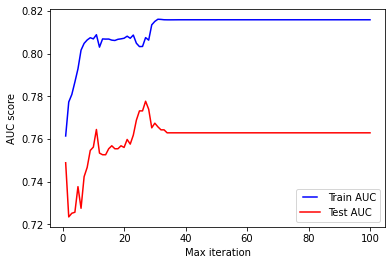

In [ ]:
from sklearn.metrics import roc_curve, auc

max_iterations = np.linspace(1, 100, 100, endpoint=True)
train_results = []
test_results = []
for max_iter in max_iterations:
   logistic_regr = LogisticRegression(max_iter=max_iter)
   logistic_regr.fit(x_train_list_pearson[5], y_train_list_pearson[5])
   train_pred = logistic_regr.predict(x_train_list_pearson[5])
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_list_pearson[5], train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = logistic_regr.predict(x_test_merged_pearson)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_merged_pearson, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_iterations, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_iterations, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Max iteration")
plt.show()

In [ ]:
print(test_results.index(max(test_results)))
print(max(test_results))

26
0.7776986377754834


In [ ]:
log_regr_data = {"Pearson": [], "Spearman": [], "Kendall": [], "Time Taken": []}
log_regr_index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Variant Merged", "Average over 5 variants"]
logistic_regr = LogisticRegression(max_iter=35)

for i in range(6):
    start = time.time()
    logistic_regr.fit(x_train_list_pearson[i], y_train_list_pearson[i])
    score_train = logistic_regr.score(x_train_list_pearson[i], y_train_list_pearson[i])
    print(score_train)
    score = logistic_regr.score(x_test_merged_pearson, y_test_merged_pearson)
    log_regr_data["Pearson"].append(score)

    logistic_regr.fit(x_train_list_spearman[i], y_train_list_spearman[i])
    score = logistic_regr.score(x_test_merged_spearman, y_test_merged_spearman)
    log_regr_data["Spearman"].append(score)

    logistic_regr.fit(x_train_list_kendall[i], y_train_list_kendall[i])
    score = logistic_regr.score(x_test_merged_kendall, y_test_merged_kendall)
    log_regr_data["Kendall"].append(score)
    end = time.time()
    log_regr_data["Time Taken"].append(end - start)

log_regr_data["Pearson"].append(sum(log_regr_data["Pearson"][:-1])/5)
log_regr_data["Spearman"].append(sum(log_regr_data["Spearman"][:-1])/5)
log_regr_data["Kendall"].append(sum(log_regr_data["Kendall"][:-1])/5)
log_regr_data["Time Taken"].append(sum(log_regr_data["Time Taken"][:-1])/5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

0.8257344501697234


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

0.8231626328217237


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

0.8261655848981816


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

0.8245462025632075


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

0.8250565241420892


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

0.8256789418940865


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

In [ ]:
log_regr_df = pd.DataFrame(log_regr_data)
log_regr_df.index = log_regr_index
print("Logistic Regression Classifier Score")
log_regr_df

Logistic Regression Classifier Score


,Pearson,Spearman,Kendall,Time Taken
Variant 1,0.7610,0.7610,0.7610,0.833843
Variant 2,0.7620,0.7620,0.7620,1.677274
Variant 3,0.7590,0.7590,0.7590,2.350913
Variant 4,0.7590,0.7590,0.7590,3.359592
Variant 5,0.7610,0.7610,0.7610,4.024827
Variant Merged,0.7640,0.7640,0.7640,11.942633
Average over 5 variants,0.7604,0.7604,0.7604,2.449290


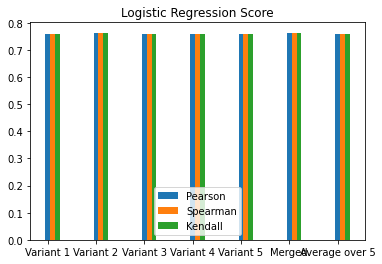

In [ ]:
plt.title("Logistic Regression Score")
plt.bar(["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged", "Average over 5"], log_regr_data['Pearson'], width = 0.1, label = 'Pearson')
plt.bar(np.arange(len(log_regr_data['Spearman'])) + 0.1, log_regr_data['Spearman'], width = 0.1, label = 'Spearman')
plt.bar(np.arange(len(log_regr_data['Kendall'])) + 0.2, log_regr_data['Kendall'], width = 0.1, label = 'Kendall')

plt.legend()
plt.show()

In [ ]:
cm_index = ["Actual Negative", "Actual Positive"]

logistic_regr.fit(x_train_list_pearson[5], y_train_list_pearson[5])
y_pred = logistic_regr.predict(x_test_merged_pearson)
print("Pearson")
cm_pearson = confusion_matrix(y_test_merged_pearson, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test_merged_pearson, y_pred).ravel()
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))
print("True Positive: " + str(tp))
df_pearson = pd.DataFrame(cm_pearson, columns = ["Predicted Negative", "Predicted Positive"])
df_pearson.index = cm_index
print(df_pearson)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test_merged_pearson, y_pred, average="weighted"))
log_reg_pearson = logistic_regr

logistic_regr.fit(x_train_list_spearman[5], y_train_list_spearman[5])
y_pred = logistic_regr.predict(x_test_merged_spearman)
print("Spearman")
cm_spearman = confusion_matrix(y_test_merged_spearman, y_pred)
df_spearman = pd.DataFrame(cm_spearman, columns = ["Predicted Negative", "Predicted Positive"])
df_spearman.index = cm_index
print(df_spearman)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test_merged_spearman, y_pred, average="weighted"))
log_reg_spearman = logistic_regr

logistic_regr.fit(x_train_list_kendall[5], y_train_list_kendall[5])
y_pred = logistic_regr.predict(x_test_merged_kendall)
print("Kendall")
cm_kendall = confusion_matrix(y_test_merged_kendall, y_pred)
df_kendall = pd.DataFrame(cm_kendall, columns = ["Predicted Negative", "Predicted Positive"])
df_kendall.index = cm_index
print(df_kendall)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test_merged_kendall, y_pred, average="weighted"))
log_reg_kendall = logistic_regr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Pearson
True Negative: 271
False Positive: 86
False Negative: 150
True Positive: 493
                 Predicted Negative  Predicted Positive
Actual Negative                 271                  86
Actual Positive                 150                 493
Precision, Recall, Fscore
(0.777296805451286, 0.764, 0.7675269081408117, None)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Spearman
                 Predicted Negative  Predicted Positive
Actual Negative                 271                  86
Actual Positive                 150                 493
Precision, Recall, Fscore
(0.777296805451286, 0.764, 0.7675269081408117, None)
Kendall
                 Predicted Negative  Predicted Positive
Actual Negative                 271                  86
Actual Positive                 150                 493
Precision, Recall, Fscore
(0.777296805451286, 0.764, 0.7675269081408117, None)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Random Forest Classification**

Test overfitting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/loc

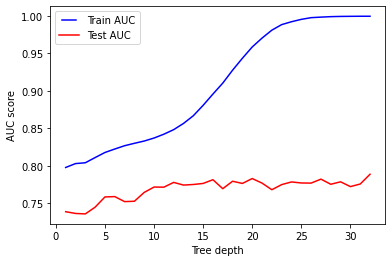

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train_list_pearson[5], y_train_list_pearson[5])
   train_pred = rf.predict(x_train_list_pearson[5])
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_list_pearson[5], train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test_merged_pearson)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_merged_pearson, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [ ]:
rfc_data = {"Pearson": [], "Spearman": [], "Kendall": [], "Time Taken": []}
rfc_index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Variant Merged", "Average over 5 variants"]
rfc = RandomForestClassifier(max_depth=16, random_state=0)

for i in range(6):
    start = time.time()
    rfc.fit(x_train_list_pearson[i], y_train_list_pearson[i])
    score_train = rfc.score(x_train_list_pearson[i], y_train_list_pearson[i])
    print("Train score")
    print(score_train)
    score = rfc.score(x_test_merged_pearson, y_test_merged_pearson)
    print("Test score")
    print(score)
    rfc_data["Pearson"].append(score)

    rfc.fit(x_train_list_spearman[i], y_train_list_spearman[i])
    score = rfc.score(x_test_merged_spearman, y_test_merged_spearman)
    rfc_data["Spearman"].append(score)

    rfc.fit(x_train_list_kendall[i], y_train_list_kendall[i])
    score = rfc.score(x_test_merged_kendall, y_test_merged_kendall)
    rfc_data["Kendall"].append(score)
    end = time.time()
    rfc_data["Time Taken"].append(end - start)

rfc_data["Pearson"].append(sum(rfc_data["Pearson"][:-1])/5)
rfc_data["Spearman"].append(sum(rfc_data["Spearman"][:-1])/5)
rfc_data["Kendall"].append(sum(rfc_data["Kendall"][:-1])/5)
rfc_data["Time Taken"].append(sum(rfc_data["Time Taken"][:-1])/5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train score
0.955090478399961
Test score
0.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train score
0.9390003935458481
Test score
0.813


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train score
0.9294868618804605
Test score
0.817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train score
0.9212461975764225
Test score
0.815


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train score
0.9176807516454806
Test score
0.812


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train score
0.8999772732173991
Test score
0.816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
rfc_df = pd.DataFrame(rfc_data)
rfc_df.index = rfc_index
print("Random Forest Classification Score")
rfc_df

Random Forest Classification Score


,Pearson,Spearman,Kendall,Time Taken
Variant 1,0.8000,0.8000,0.8000,17.614882
Variant 2,0.8130,0.8130,0.8130,34.896646
Variant 3,0.8170,0.8170,0.8170,52.643489
Variant 4,0.8150,0.8150,0.8150,69.583398
Variant 5,0.8120,0.8120,0.8120,86.995146
Variant Merged,0.8160,0.8160,0.8160,299.000768
Average over 5 variants,0.8114,0.8114,0.8114,52.346712


In [ ]:
cm_index = ["Actual Negative", "Actual Positive"]

rfc.fit(x_train_list_pearson[5], y_train_list_pearson[5])
y_pred = rfc.predict(x_test_merged_pearson)
y_pred_classification = y_pred
print("Pearson")
cm_pearson = confusion_matrix(y_test_merged_pearson, y_pred)
df_pearson = pd.DataFrame(cm_pearson, columns = ["Predicted Negative", "Predicted Positive"])
df_pearson.index = cm_index
print(df_pearson)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test_merged_pearson, y_pred, average="weighted"))
rfc_pearson = rfc

rfc.fit(x_train_list_spearman[5], y_train_list_spearman[5])
y_pred = rfc.predict(x_test_merged_spearman)
print("Spearman")
cm_spearman = confusion_matrix(y_test_merged_spearman, y_pred)
df_spearman = pd.DataFrame(cm_spearman, columns = ["Predicted Negative", "Predicted Positive"])
df_spearman.index = cm_index
print(df_spearman)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test_merged_spearman, y_pred, average="weighted"))
rfc_spearman = rfc

rfc.fit(x_train_list_kendall[5], y_train_list_kendall[5])
y_pred = rfc.predict(x_test_merged_kendall)
print("Kendall")
cm_kendall = confusion_matrix(y_test_merged_kendall, y_pred)
df_kendall = pd.DataFrame(cm_kendall, columns = ["Predicted Negative", "Predicted Positive"])
df_kendall.index = cm_index
print(df_kendall)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test_merged_kendall, y_pred, average="weighted"))
rfc_kendall = rfc


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Pearson
                 Predicted Negative  Predicted Positive
Actual Negative                 227                 130
Actual Positive                  54                 589
Precision, Recall, Fscore
(0.8151363251649434, 0.816, 0.8101743793701867, None)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Spearman
                 Predicted Negative  Predicted Positive
Actual Negative                 227                 130
Actual Positive                  54                 589
Precision, Recall, Fscore
(0.8151363251649434, 0.816, 0.8101743793701867, None)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Kendall
                 Predicted Negative  Predicted Positive
Actual Negative                 227                 130
Actual Positive                  54                 589
Precision, Recall, Fscore
(0.8151363251649434, 0.816, 0.8101743793701867, None)


### **Support Vector Classifier**

Linear SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#Pick Pearson
x_train = x_train_list_pearson[5]
y_train = y_train_list_pearson[5]
x_test = x_test_merged_pearson
y_test = y_test_merged_pearson

scaler = StandardScaler()

regularization = 0.001 # L2 regularization

svc_linear_train_scores = {}
svc_linear_test_scores = {}
svc_linear_times = {}

# Fit the scaling to training data and test data
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

while regularization <= 1000:
  start = time.time()
  svc_linear = SVC(kernel='linear', C=regularization, max_iter=500)
  svc_linear.fit(x_train_scaled, y_train)

  print("Regularization: ", regularization)

  svc_linear_train_score = svc_linear.score(x_train_scaled, y_train)
  print("Train: ", svc_linear_train_score)

  svc_linear_test_score = svc_linear.score(x_test_scaled, y_test)
  print("Test: ", svc_linear_test_score)

  svc_linear_train_scores[regularization] = svc_linear_train_score
  svc_linear_test_scores[regularization] = svc_linear_test_score

  end = time.time()

  svc_linear_times[regularization] = end - start
  
  regularization *= 10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.001
Train:  0.44673721369645314
Test:  0.643


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.01
Train:  0.44667085812681545
Test:  0.642


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.1
Train:  0.44673389591797125
Test:  0.642


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  1.0
Train:  0.5532793751959563
Test:  0.356


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  10.0
Train:  0.44792166061448574
Test:  0.644


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  100.0
Train:  0.5778624548574766
Test:  0.456


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  1000.0
Train:  0.48421981609553877
Test:  0.555


,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
Time Taken,49.632922,49.622289,49.650115,37.334838,27.830386,22.141036,23.460287


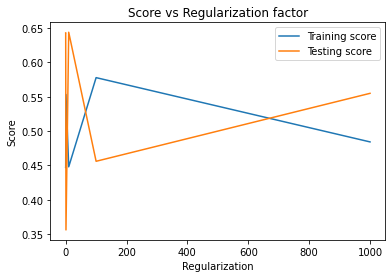

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(svc_linear_train_scores.keys()), list(svc_linear_train_scores.values()), label = 'Training score')
plt.plot(list(svc_linear_test_scores.keys()), list(svc_linear_test_scores.values()), label = 'Testing score')
plt.title("Score vs Regularization factor")
plt.xlabel("Regularization")
plt.ylabel("Score")
plt.legend()
svc_linear_df = pd.DataFrame(svc_linear_times, index=["Time Taken"])
svc_linear_df

In [ ]:
best = max(svc_linear_test_scores, key=svc_linear_test_scores.get)
svc_linear = SVC(kernel='linear', C=best, max_iter=500)
svc_linear.fit(x_train_scaled, y_train)

y_pred = svc_linear.predict(x_test_scaled)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test, y_pred, average="weighted"))
print("Best regularization: " + str(best))
cm_linear = confusion_matrix(y_test, y_pred)
df_linear = pd.DataFrame(cm_linear, columns = ["Predicted Negative", "Predicted Positive"])
df_linear.index = cm_index
df_linear

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision, Recall, Fscore
(0.6520481444333, 0.644, 0.5073886178861788, None)
Best regularization: 10.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


,Predicted Negative,Predicted Positive
Actual Negative,2,355
Actual Positive,1,642


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

lin_svc_data = {"Accuracy": [], "Time Taken": []}
lin_svc_index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Variant Merged", "Average over 5 variants"]
svc_linear = SVC(kernel='linear', C=10, max_iter=500)

for i in range(6):
    start = time.time()
    svc_linear.fit(x_train_list_pearson[i], y_train_list_pearson[i])
    score_train = svc_linear.score(x_train_list_pearson[i], y_train_list_pearson[i])
    print(score_train)
    score = svc_linear.score(x_test_merged_pearson, y_test_merged_pearson)
    lin_svc_data["Accuracy"].append(score)

    end = time.time()
    lin_svc_data["Time Taken"].append(end - start)

lin_svc_data["Accuracy"].append(sum(lin_svc_data["Accuracy"][:-1])/5)
lin_svc_data["Time Taken"].append(sum(lin_svc_data["Time Taken"][:-1])/5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.6877823634276783


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.5976116686343959


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.565715371021817


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.4443537126614472


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.4387630005526805


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.44792166061448574


In [ ]:
lin_svc_df = pd.DataFrame(lin_svc_data)
lin_svc_df.index = lin_svc_index
print("Linear SVC Classifier Score")
lin_svc_df

Linear SVC Classifier Score


,Accuracy,Time Taken
Variant 1,0.6830,1.071550
Variant 2,0.4560,2.480324
Variant 3,0.3660,3.923224
Variant 4,0.6390,5.091311
Variant 5,0.5940,7.497102
Variant Merged,0.6440,29.286992
Average over 5 variants,0.5476,4.012703


In [ ]:
svc_linear.fit(x_train_list_pearson[5], y_train_list_pearson[5])
pred = svc_linear.predict(x_test_merged_pearson)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
data = {"Predicted Value": pred, "Target Value": list(y_test_merged_pearson['target'])}
lin_svc_df = pd.DataFrame(data)
lin_svc_df

,Predicted Value,Target Value
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
995,1,0
996,1,1
997,1,0
998,1,0


Poly SVM

In [ ]:
regularization = 0.001 # L2 regularization

svc_poly_train_scores = {}
svc_poly_test_scores = {}
svc_poly_times = {}

while regularization <= 1000:
  start = time.time()
  svc_poly = SVC(kernel='poly', C=regularization, max_iter=500)
  svc_poly.fit(x_train_scaled, y_train)

  print("Regularization: ", regularization)

  svc_poly_train_score = svc_poly.score(x_train_scaled, y_train)
  print("Train: ", svc_poly_train_score)

  svc_poly_test_score = svc_poly.score(x_test_scaled, y_test)
  print("Test: ", svc_poly_test_score)

  svc_poly_train_scores[regularization] = svc_poly_train_score
  svc_poly_test_scores[regularization] = svc_poly_test_score

  end = time.time()
  svc_poly_times[regularization] = end - start

  regularization *= 10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.001
Train:  0.44663104478503285
Test:  0.643


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.01
Train:  0.44666256368061075
Test:  0.638


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.1
Train:  0.44666588145909264
Test:  0.634


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  1.0
Train:  0.4462378880349296
Test:  0.629


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  10.0
Train:  0.4461499669051596
Test:  0.626


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  100.0
Train:  0.44471005104402195
Test:  0.621


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  1000.0
Train:  0.44489252886052555
Test:  0.617


,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
Time Taken,54.276927,54.488689,54.349591,41.340313,27.126349,25.761258,17.666214


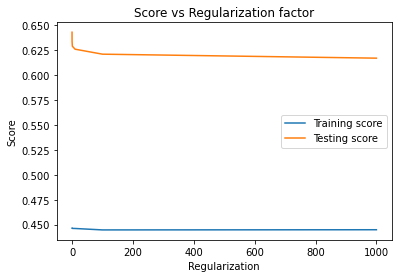

In [ ]:
plt.plot(list(svc_poly_train_scores.keys()), list(svc_poly_train_scores.values()), label = 'Training score')
plt.plot(list(svc_poly_test_scores.keys()), list(svc_poly_test_scores.values()), label = 'Testing score')
plt.title("Score vs Regularization factor")
plt.xlabel("Regularization")
plt.ylabel("Score")
plt.legend()
svc_poly_df = pd.DataFrame(svc_poly_times, index=["Time Taken"])
svc_poly_df

In [ ]:
best = max(svc_poly_test_scores, key=svc_poly_test_scores.get)
svc_poly = SVC(kernel='poly', C=best, max_iter=500)
svc_poly.fit(x_train_scaled, y_train)

y_pred = svc_poly.predict(x_test_scaled)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test, y_pred, average="weighted"))
print("Best regularization: " + str(best))
cm_poly = confusion_matrix(y_test, y_pred)
df_poly = pd.DataFrame(cm_poly, columns = ["Predicted Negative", "Predicted Positive"])
df_poly.index = cm_index
df_poly

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision, Recall, Fscore
(0.413449, 0.643, 0.5032854534388314, None)
Best regularization: 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Predicted Negative,Predicted Positive
Actual Negative,0,357
Actual Positive,0,643


RBF SVM

In [ ]:
regularization = 0.001 # L2 regularization

svc_rbf_train_scores = {}
svc_rbf_test_scores = {}
svc_rbf_times = {}

while regularization <= 1000:
  start = time.time()
  svc_rbf = SVC(kernel='rbf', C=regularization, max_iter=500)
  svc_rbf.fit(x_train_scaled, y_train)

  print("Regularization: ", regularization)

  svc_rbf_train_score = svc_rbf.score(x_train_scaled, y_train)
  print("Train: ", svc_rbf_train_score)

  svc_rbf_test_score = svc_rbf.score(x_test_scaled, y_test)
  print("Test: ", svc_rbf_test_score)

  svc_rbf_train_scores[regularization] = svc_rbf_train_score
  svc_rbf_test_scores[regularization] = svc_rbf_test_score

  end = time.time()
  svc_rbf_times[regularization] = end - start

  regularization *= 10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.001
Train:  0.49750088335852083
Test:  0.64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.01
Train:  0.49750088335852083
Test:  0.64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  0.1
Train:  0.4684454383034208
Test:  0.642


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  1.0
Train:  0.5598684832609782
Test:  0.508


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  10.0
Train:  0.40596669282182035
Test:  0.473


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  100.0
Train:  0.42752229961862137
Test:  0.427


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Regularization:  1000.0
Train:  0.43772612733965593
Test:  0.402


,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
Time Taken,92.68099,91.643709,91.811137,92.527648,88.680478,88.582021,84.556544


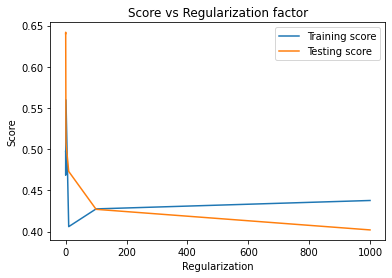

In [ ]:
plt.plot(list(svc_rbf_train_scores.keys()), list(svc_rbf_train_scores.values()), label = 'Training score')
plt.plot(list(svc_rbf_test_scores.keys()), list(svc_rbf_test_scores.values()), label = 'Testing score')
plt.title("Score vs Regularization factor")
plt.xlabel("Regularization")
plt.ylabel("Score")
plt.legend()
svc_rbf_df = pd.DataFrame(svc_rbf_times, index=["Time Taken"])
svc_rbf_df

In [ ]:
best = max(svc_rbf_test_scores, key=svc_rbf_test_scores.get)
svc_rbf = SVC(kernel='rbf', C=best, max_iter=500)
svc_rbf.fit(x_train_scaled, y_train)

y_pred = svc_rbf.predict(x_test_scaled)
print("Precision, Recall, Fscore")
print(precision_recall_fscore_support(y_test, y_pred, average="weighted"))
print("Best regularization: " + str(best))
cm_rbf = confusion_matrix(y_test, y_pred)
df_rbf = pd.DataFrame(cm_rbf, columns = ["Predicted Negative", "Predicted Positive"])
df_rbf.index = cm_index
df_rbf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision, Recall, Fscore
(0.5903236507535573, 0.642, 0.5322855408967639, None)
Best regularization: 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


,Predicted Negative,Predicted Positive
Actual Negative,18,339
Actual Positive,19,624


## Classifier for non-zero

### **Processing for non-zero data**

In [ ]:
import numpy

def filter_non_zero(df):
  return df[df['target'] != 0]

def filter_non_zero_test_from_classification(df, y_pred_classification, index_start):
  temp = y_pred_classification[index_start: index_start + 100]
  remove_index = []
  for row in range(len(temp)):
    if (temp[row] == 0): # Check for zero data
      remove_index.append(row)
  remove_index = numpy.array(remove_index)
  df = df.reset_index()
  df = df.drop(remove_index)
  df = df.drop(columns="index")
  return df
  

In [ ]:
def process_train_data_non_zero(urls):
  df_list = read_data(urls)
  df_list = merge_days(df_list)
  df_list_2 = []
  normalize_scalar = []

  for df in df_list:
     df = removeCols529(df)
     df = df.drop(['post_promotion_status'], 1)
     df = filter_non_zero(df)
     df_list_2.append(df)

  df_list = df_list_2
  merged_df = pd.concat(df_list)
  df_list.append(merged_df)
  unwanted_attributes = []
  x_train_list = []
  y_train_list = []
  scaler_x_list = []
  scaler_y_list = []

  for df in df_list:
    features, labels = split_df(df)
    features, scaler_x = normalizeTrain(features)
    labels, scaler_y = normalizeTrainTarget(labels)
    x_train_list.append(features)
    y_train_list.append(labels)
    scaler_x_list.append(scaler_x)
    scaler_y_list.append(scaler_y)   

  return x_train_list, y_train_list, unwanted_attributes, scaler_x_list, scaler_y_list

def process_test_data_non_zero(urls, columns_to_drop, scaler_x, scaler_y):
  df_list = read_data(urls)
  df_list = merge_days(df_list)
  df_list_2 = []
  start = 0

  for df in df_list:
    df = removeCols529(df)
    df = df.drop(['post_promotion_status'], 1)
    df = filter_non_zero_test_from_classification(df, y_pred_classification, start)
    df_list_2.append(df)
    start += 100

  df_list = df_list_2
  merged_df = pd.concat(df_list)
  df_list.append(merged_df)
  x_test_list = []
  y_test_list = []

  for df in df_list:
    features, labels = split_df(df)
    features = normalizeTest(features, scaler_x)
    labels = normalizeTestTarget(labels, scaler_y)
    x_test_list.append(features)
    y_test_list.append(labels)

  return x_test_list, y_test_list

In [ ]:
x_train_non_zero_list, y_train_non_zero_list, columns_to_drop, scaler_x_list, scaler_y_list = process_train_data_non_zero(training_files)

In [ ]:
x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[5], scaler_y_list[5])
x_test_non_zero_merged = x_test_non_zero_list[10]
y_test_non_zero_merged = y_test_non_zero_list[10]
print(y_test_non_zero_merged)

       target
0    0.377921
1   -0.279842
2   -0.319706
3    1.912700
4   -0.299774
..        ...
714 -0.319706
715 -0.299774
716 -0.319706
717 -0.319706
718 -0.220045

[719 rows x 1 columns]


**AUC@10 Metric** Idk why not working zzzzzzzzzzzz

In [ ]:
def aucAt10(pred_y, actual_y):
  fpr, tpr, thresholds = metrics.roc_curve(actual_y, pred_y)
  print("fpr" + str(fpr))
  print("tpr", str(tpr))
  return metrics.auc(fpr, tpr)

**Hits@10 Metric**

In [ ]:
def hitsAt10(variant_scores, y_test_non_zero_list):
  totalHits = 0
  totalMisses = 0
  auc_pred = []

  for i in range(len(variant_scores)):
    hits = 0
    miss = 0
    y_predicted = variant_scores[i]
    y_actual = y_test_non_zero_list[i].values.tolist()
    y_predicted_with_pos = []
    y_actual_with_pos = []
    
    for j in range(len(y_actual)):
      y_actual_with_pos.append([y_actual[j], j])
    for j in range(len(y_predicted)):
      y_predicted_with_pos.append([y_predicted[j], j])

    y_actual_with_pos.sort()
    y_actual_with_pos.reverse()

    y_predicted_with_pos.sort()
    y_predicted_with_pos.reverse()

    y_actual_dic = {}
    for target, pos in y_actual_with_pos[:10]:
      y_actual_dic[pos] = target

    
    for target, pos in y_predicted_with_pos[:10]:
      if (y_actual_dic.get(pos) is not None):
        hits += 1 # True Positive
        auc_pred.append(1)
      else:
        auc_pred.append(0)
        miss += 1 # False Positive

    totalHits += hits
    totalMisses += miss
  
  hitsAt10Score = totalHits/11
  
  return hitsAt10Score
    

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

poly_features = PolynomialFeatures(degree=1, include_bias=True)
lin_reg = LinearRegression()
mlp = MLPRegressor(alpha = 1e-4, hidden_layer_sizes = (150,5,20,5), 
random_state = 12, max_iter = 500, activation = 'relu', early_stopping = True, learning_rate_init = 0.01)

**Polynomial Regresion**

In [ ]:
scores = []
poly_data = {"Score": [], "Mean Absolute Error": [], "Mean Squared Error": [], "Root Mean Squared Error": [], "Time Taken": []}
for i in range(6):
  x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[i], scaler_y_list[i])
  x_test_non_zero_merged = x_test_non_zero_list[10]
  y_test_non_zero_merged = y_test_non_zero_list[10]  
  start = time.time()
  x_poly_train = poly_features.fit_transform(x_train_non_zero_list[i])
  lin_reg.fit(x_poly_train, y_train_non_zero_list[i])

  x_poly_test = poly_features.fit_transform(x_test_non_zero_merged)
  score = lin_reg.score(x_poly_test, y_test_non_zero_merged)
  if i == 5:
    print("Variant Merged Score: " +str(score))
  else:
    print("Variant Score" + str(i + 1) + ": " + str(score))
    scores.append(score)
  
  y_predicted = lin_reg.predict(x_poly_test)
  y_test_non_zero_merged_inversed = scaler_y_list[5].inverse_transform(y_test_non_zero_merged)
  y_predicted_inversed = scaler_y_list[5].inverse_transform(y_predicted)
  # y_train_predicted_inversed = scaler_y_list[5].inverse_transform(np.array(y_train_predicted).reshape(-1, 1))

  mae = mean_absolute_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  mse = mean_squared_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  rms = sqrt(mse)

  end = time.time()
  poly_data["Score"].append(score)
  poly_data["Mean Absolute Error"].append(mae)
  poly_data["Mean Squared Error"].append(mse)
  poly_data["Root Mean Squared Error"].append(rms)
  poly_data["Time Taken"].append(end - start)

print("Average Score over 5 Variants: " + str(sum(scores)/len(scores)))

Variant Score1: 0.12211427952412324
Variant Score2: 0.10337224632135589
Variant Score3: 0.11300919654649633
Variant Score4: 0.10569461914856548
Variant Score5: 0.10446019310657662
Variant Merged Score: 0.10765579512654311
Average Score over 5 Variants: 0.1097301069294235


In [ ]:
print("Polynomial Regression Score")
poly_df = pd.DataFrame(poly_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
poly_df

Polynomial Regression Score


,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Time Taken
Variant 1,0.122114,34.407153,12348.008183,111.121592,0.049206
Variant 2,0.103372,35.801282,12121.469969,110.097548,0.051141
Variant 3,0.113009,37.297895,14050.464554,118.534655,0.060955
Variant 4,0.105695,37.406219,13398.707602,115.752787,0.078913
Variant 5,0.104460,36.896336,13447.174760,115.961954,0.086344
Merged,0.107656,36.738448,13271.243252,115.200882,0.205821


**Calculating Hits@10**

In [ ]:
poly_hits_data = {"Hits@10": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[i], scaler_y_list[i])
  x_test_non_zero_merged = x_test_non_zero_list[10]
  y_test_non_zero_merged = y_test_non_zero_list[10]  
  x_poly_train = poly_features.fit_transform(x_train_non_zero_list[i])
  lin_reg.fit(x_poly_train, y_train_non_zero_list[i])
  variant_scores = []

  for j in range(11):
    x_poly_test = poly_features.fit_transform(x_test_non_zero_list[j])
    score = lin_reg.score(x_poly_test, y_test_non_zero_list[j])
    y_predicted = lin_reg.predict(x_poly_test)
    variant_scores.append(y_predicted)
  
  hitsAt10Score = hitsAt10(variant_scores, y_test_non_zero_list)
  end = time.time()
  poly_hits_data["Hits@10"].append(hitsAt10Score)
  poly_hits_data["Time Taken"].append(end - start)


In [ ]:
print("Hits @ 10")
poly_hits_df = pd.DataFrame(poly_hits_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
poly_hits_df

Hits @ 10


,Hits@10,Time Taken
Variant 1,5.272727,0.834178
Variant 2,4.909091,0.872838
Variant 3,5.090909,0.862420
Variant 4,5.000000,0.871701
Variant 5,5.181818,0.870066
Merged,5.090909,0.965506


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
scores = []
rfr_data = {"Score": [], "Mean Absolute Error": [], "Mean Squared Error": [], "Root Mean Squared Error": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[i], scaler_y_list[i])
  x_test_non_zero_merged = x_test_non_zero_list[10]
  y_test_non_zero_merged = y_test_non_zero_list[10]  
  rfr.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  score = rfr.score(x_test_non_zero_merged, y_test_non_zero_merged)
  if i == 5:
    print("Variant Merged Score: " +str(score))
  else:
    print("Variant Score" + str(i + 1) + ": " + str(score))
    scores.append(score)
  
  y_predicted = rfr.predict(x_test_non_zero_merged)

  y_test_non_zero_merged_inversed = scaler_y_list[5].inverse_transform(y_test_non_zero_merged)
  y_predicted_inversed = scaler_y_list[5].inverse_transform(np.array(y_predicted).reshape(-1, 1))
  mae = mean_absolute_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  mse = mean_squared_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  rms = sqrt(mse)

  end = time.time()
  rfr_data["Score"].append(score)
  rfr_data["Mean Absolute Error"].append(mae)
  rfr_data["Mean Squared Error"].append(mse)
  rfr_data["Root Mean Squared Error"].append(rms)
  rfr_data["Time Taken"].append(end - start)

print("Average Score over 5 Variants: " + str(sum(scores)/len(scores)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Variant Score1: 0.2674572475839474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Variant Score2: 0.2181346121457507


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Variant Score3: 0.3213943995745163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Variant Score4: 0.28956669410903857


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Variant Score5: 0.24241298938042055


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Variant Merged Score: 0.3123927131253037
Average Score over 5 Variants: 0.2677931885587347


In [ ]:
print("Random Forest Score")
rfr_df = pd.DataFrame(rfr_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
rfr_df

Random Forest Score


,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Time Taken
Variant 1,0.267457,32.670764,10303.669020,101.506990,20.359547
Variant 2,0.218135,35.847519,10570.002746,102.810519,35.415313
Variant 3,0.321394,35.613701,10749.518369,103.679884,53.225895
Variant 4,0.289567,36.751198,10643.890040,103.169230,71.943429
Variant 5,0.242413,35.048419,11375.714233,106.656993,90.810725
Merged,0.312393,33.411610,10226.326922,101.125303,290.967386


In [ ]:
rfr_hits_data = {"Hits@10": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  rfr.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  variant_scores = []
  for j in range(11):
    score = rfr.score(x_test_non_zero_list[j], y_test_non_zero_list[j])
    y_predicted = rfr.predict(x_test_non_zero_list[i])
    variant_scores.append(y_predicted)
  
  hitsAt10Score = hitsAt10(variant_scores, y_test_non_zero_list)
  end = time.time()
  rfr_hits_data["Hits@10"].append(hitsAt10Score)
  rfr_hits_data["Time Taken"].append(end - start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  af

In [ ]:
print("Hits @ 10")
rfr_hits_df = pd.DataFrame(rfr_hits_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
rfr_hits_df

Hits @ 10


,Hits@10,Time Taken
Variant 1,2.363636,16.970503
Variant 2,1.272727,34.992805
Variant 3,1.636364,52.918341
Variant 4,1.727273,70.801265
Variant 5,1.454545,91.073345
Merged,2.090909,291.198200


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=0)

In [ ]:
scores = []
tree_data = {"Score": [], "Mean Absolute Error": [], "Mean Squared Error": [], "Root Mean Squared Error": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[i], scaler_y_list[i])
  x_test_non_zero_merged = x_test_non_zero_list[10]
  y_test_non_zero_merged = y_test_non_zero_list[10]  
  tree_reg.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  score = tree_reg.score(x_test_non_zero_merged, y_test_non_zero_merged)
  if i == 5:
    print("Variant Merged Score: " +str(score))
  else:
    print("Variant Score" + str(i + 1) + ": " + str(score))
    scores.append(score)
  
  y_predicted = tree_reg.predict(x_test_non_zero_merged)

  y_test_non_zero_merged_inversed = scaler_y_list[5].inverse_transform(y_test_non_zero_merged)
  y_predicted_inversed = scaler_y_list[5].inverse_transform(np.array(y_predicted).reshape(-1, 1))
  mae = mean_absolute_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  mse = mean_squared_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  rms = sqrt(mse)

  end = time.time()
  tree_data["Score"].append(score)
  tree_data["Mean Absolute Error"].append(mae)
  tree_data["Mean Squared Error"].append(mse)
  tree_data["Root Mean Squared Error"].append(rms)
  tree_data["Time Taken"].append(end - start)

print("Average Score over 5 Variants: " + str(sum(scores)/len(scores)))

Variant Score1: 0.10407977798472268
Variant Score2: -0.26952899171274103
Variant Score3: 0.19336007900740104
Variant Score4: 0.2769881015760516
Variant Score5: -0.1551413560202084
Variant Merged Score: -0.2440781680410229
Average Score over 5 Variants: 0.029951522167045174


In [ ]:
print("Decision Tree Score")
tree_df = pd.DataFrame(tree_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
tree_df

Decision Tree Score


,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Time Taken
Variant 1,0.104080,36.831937,12601.674654,112.257181,1.007047
Variant 2,-0.269529,39.282287,17162.704907,131.006507,1.289822
Variant 3,0.193360,40.472012,12777.658544,113.038306,1.559675
Variant 4,0.276988,37.006650,10832.345669,104.078555,1.901530
Variant 5,-0.155141,41.194370,17345.278867,131.701476,2.196645
Merged,-0.244078,40.287900,18502.349096,136.023340,5.263527


**Hits@10 Score**

In [ ]:
tree_hits_data = {"Hits@10": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  tree_reg.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  variant_scores = []
  for j in range(11):
    score = tree_reg.score(x_test_non_zero_list[j], y_test_non_zero_list[j])
    y_predicted = tree_reg.predict(x_test_non_zero_list[i])
    variant_scores.append(y_predicted)
  
  hitsAt10Score = hitsAt10(variant_scores, y_test_non_zero_list)
  end = time.time()
  tree_hits_data["Hits@10"].append(hitsAt10Score)
  tree_hits_data["Time Taken"].append(end - start)

In [ ]:
print("Hits @ 10")
tree_hits_df = pd.DataFrame(tree_hits_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
tree_hits_df

Hits @ 10


,Hits@10,Time Taken
Variant 1,2.090909,0.319867
Variant 2,1.363636,0.605518
Variant 3,1.727273,0.899240
Variant 4,1.727273,1.201777
Variant 5,1.636364,1.518887
Merged,1.363636,4.574254


**Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=3, learning_rate=0.5, random_state=0)

In [ ]:
scores = []
gbr_data = {"Score": [], "Mean Absolute Error": [], "Mean Squared Error": [], "Root Mean Squared Error": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[i], scaler_y_list[i])
  x_test_non_zero_merged = x_test_non_zero_list[10]
  y_test_non_zero_merged = y_test_non_zero_list[10]   
  gbr.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  score = gbr.score(x_test_non_zero_merged, y_test_non_zero_merged)
  if i == 5:
    print("Variant Merged Score: " +str(score))
  else:
    print("Variant Score" + str(i + 1) + ": " + str(score))
    scores.append(score)
  
  y_predicted = gbr.predict(x_test_non_zero_merged)

  y_test_non_zero_merged_inversed = scaler_y_list[5].inverse_transform(y_test_non_zero_merged)
  y_predicted_inversed = scaler_y_list[5].inverse_transform(np.array(y_predicted).reshape(-1, 1))
  mae = mean_absolute_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  mse = mean_squared_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  rms = sqrt(mse)

  end = time.time()
  gbr_data["Score"].append(score)
  gbr_data["Mean Absolute Error"].append(mae)
  gbr_data["Mean Squared Error"].append(mse)
  gbr_data["Root Mean Squared Error"].append(rms)
  gbr_data["Time Taken"].append(end - start)

print("Average Score over 5 Variants: " + str(sum(scores)/len(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant Score1: 0.3040806765822581


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant Score2: 0.17460879673885088


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant Score3: 0.2379167375607879


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant Score4: 0.21644455298360288


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant Score5: 0.24674004678386785


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variant Merged Score: 0.25210848975894573
Average Score over 5 Variants: 0.23595816212987356


In [ ]:
print("Gradient Boosting Score")
gbr_df = pd.DataFrame(gbr_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
rfr_df

Gradient Boosting Score


,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Time Taken
Variant 1,0.267457,32.670764,10303.669020,101.506990,20.359547
Variant 2,0.218135,35.847519,10570.002746,102.810519,35.415313
Variant 3,0.321394,35.613701,10749.518369,103.679884,53.225895
Variant 4,0.289567,36.751198,10643.890040,103.169230,71.943429
Variant 5,0.242413,35.048419,11375.714233,106.656993,90.810725
Merged,0.312393,33.411610,10226.326922,101.125303,290.967386


In [ ]:
gbr_hits_data = {"Hits@10": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  gbr.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  variant_scores = []
  for j in range(11):
    score = gbr.score(x_test_non_zero_list[j], y_test_non_zero_list[j])
    y_predicted = gbr.predict(x_test_non_zero_list[i])
    variant_scores.append(y_predicted)
  
  hitsAt10Score = hitsAt10(variant_scores, y_test_non_zero_list)
  end = time.time()
  gbr_hits_data["Hits@10"].append(hitsAt10Score)
  gbr_hits_data["Time Taken"].append(end - start)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

In [ ]:
print("Hits @ 10")
gbr_hits_df = pd.DataFrame(gbr_hits_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
gbr_hits_df

Hits @ 10


,Hits@10,Time Taken
Variant 1,2.272727,0.178179
Variant 2,1.272727,0.290805
Variant 3,1.636364,0.386660
Variant 4,1.727273,0.496800
Variant 5,1.454545,0.617114
Merged,1.909091,1.830441


##Multilayer Perceptron

In [ ]:
scores = []
mlp_data = {"Score": [], "Mean Absolute Error": [], "Mean Squared Error": [], "Root Mean Squared Error": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[i], scaler_y_list[i])
  x_test_non_zero_merged = x_test_non_zero_list[10]
  y_test_non_zero_merged = y_test_non_zero_list[10]  
  mlp.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  score = mlp.score(x_test_non_zero_merged, y_test_non_zero_merged)
  if i == 5:
    print("Variant Merged Score: " +str(score))
  else:
    print("Variant Score" + str(i + 1) + ": " + str(score))
    scores.append(score)
  
  y_predicted = mlp.predict(x_test_non_zero_merged)

  y_test_non_zero_merged_inversed = scaler_y_list[5].inverse_transform(y_test_non_zero_merged)
  y_predicted_inversed = scaler_y_list[5].inverse_transform(np.array(y_predicted).reshape(-1, 1))
  mae = mean_absolute_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  mse = mean_squared_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
  rms = sqrt(mse)

  end = time.time()
  mlp_data["Score"].append(score)
  mlp_data["Mean Absolute Error"].append(mae)
  mlp_data["Mean Squared Error"].append(mse)
  mlp_data["Root Mean Squared Error"].append(rms)
  mlp_data["Time Taken"].append(end - start)

print("Average Score over 5 Variants: " + str(sum(scores)/len(scores)))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Score1: 0.04495012468380666


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Score2: 0.2735197524859928


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Score3: 0.24595780890736785


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Score4: 0.18959910834051896


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Score5: 0.3135620358159962


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: 0.1538749442454601
Average Score over 5 Variants: 0.2135177660467365


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("Multilayer Perceptron Score")
mlp_df = pd.DataFrame(mlp_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
mlp_df

Multilayer Perceptron Score


,Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Time Taken
Variant 1,0.223332,29.404103,10924.324315,104.519493,4.392838
Variant 2,0.326572,27.102187,9104.042187,95.415105,6.914516
Variant 3,0.354082,31.074626,10231.721403,101.151972,14.555664
Variant 4,0.183387,29.790108,12234.705702,110.610604,21.668374
Variant 5,0.231307,35.257148,11542.486034,107.435962,37.184265
Merged,0.175740,31.153248,12258.672212,110.718888,219.573498


## Calculate Hits@10

In [ ]:
mlp_hits_data = {"Hits@10": [], "Time Taken": []}
for i in range(6):
  start = time.time()
  mlp.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
  variant_scores = []
  for j in range(11):
    score = mlp.score(x_test_non_zero_list[j], y_test_non_zero_list[j])
    y_predicted = mlp.predict(x_test_non_zero_list[j])
    variant_scores.append(y_predicted)

  hitsAt10Score = hitsAt10(variant_scores, y_test_non_zero_list)
  end = time.time()
  mlp_hits_data["Hits@10"].append(hitsAt10Score)
  mlp_hits_data["Time Taken"].append(end - start)

print("Hits @ 10")
hits_df = pd.DataFrame(mlp_hits_data, index = ["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"])
hits_df

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Hits @ 10


,Hits@10,Time Taken
Variant 1,5.090909,3.737025
Variant 2,5.818182,6.382496
Variant 3,5.363636,13.823197
Variant 4,5.454545,20.978622
Variant 5,5.454545,36.526745
Merged,6.090909,215.153288


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: 0.2665136033685096
[0.2665136033685096, 33.35419849809712, 10908.656478546098, 104.44451387481344, 5.636363636363637]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: 0.17573998910097477
[0.17573998910097477, 31.153248480148086, 12258.672211500561, 110.71888823276976, 6.090909090909091]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: 0.2951192124735742
[0.2951192124735742, 30.815780024921768, 10483.224235330965, 102.387617587924, 5.7272727272727275]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: 0.15844427203981726
[0.15844427203981726, 32.13622968305211, 12515.899934927698, 111.87448294820271, 5.818181818181818]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: -0.26887371348617317
[-0.26887371348617317, 33.723490387099964, 18871.11679050263, 137.37218346704194, 5.909090909090909]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: 0.2916072643376333
[0.2916072643376333, 35.540563849755415, 10535.455109634006, 102.6423650820362, 5.818181818181818]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, b

Variant Merged Score: 0.1538749442454601
[0.1538749442454601, 31.077034687544405, 12583.856515275242, 112.17778975927116, 5.636363636363637]


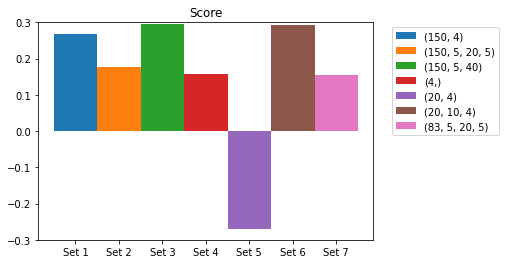

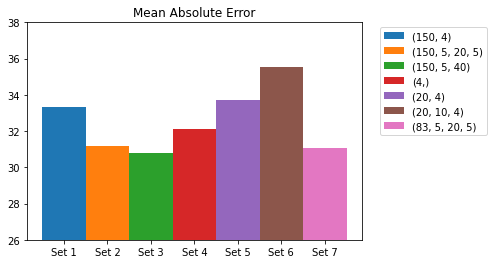

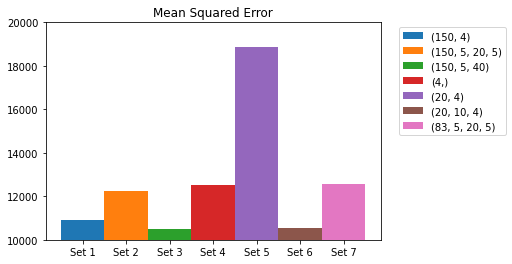

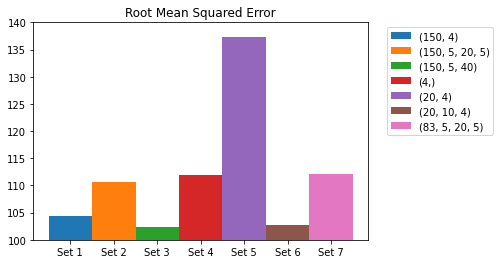

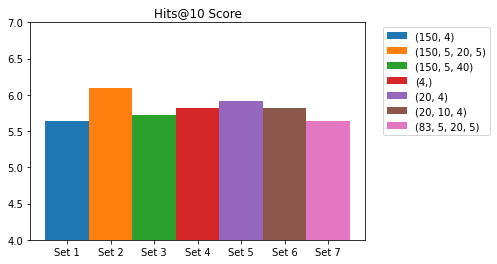

<Figure size 432x288 with 0 Axes>

In [ ]:
# Test for various hidden layer sizes
hidden_layer_list = [(150, 4), (150, 5, 20, 5), (150, 5, 40), (4,), (20, 4), (20, 10, 4), (83, 5, 20, 5)]
hidden_layer_string_list = ["(150, 4)", "(150, 5, 20, 5)", "(150, 5, 40)", "(4,)", "(20, 4)", "(20, 10, 4)", "(83, 5, 20, 5)"]
train_results = []
test_results = []
mlp_data = {"Score": [], "Mean Absolute Error": [], "Mean Squared Error": [], "Root Mean Squared Error": [], "Hits@10": []}
for hidden_layer in hidden_layer_list:
    mlp = MLPRegressor(alpha = 1e-4, hidden_layer_sizes = hidden_layer, 
    random_state = 12, max_iter = 500, activation = 'relu', early_stopping = True, learning_rate_init = 0.01)
    layer_data = []
    x_test_non_zero_list, y_test_non_zero_list = process_test_data_non_zero(testing_files, columns_to_drop, scaler_x_list[i], scaler_y_list[i])
    x_test_non_zero_merged = x_test_non_zero_list[10]
    y_test_non_zero_merged = y_test_non_zero_list[10]  
    mlp.fit(x_train_non_zero_list[i], y_train_non_zero_list[i])
    score = mlp.score(x_test_non_zero_merged, y_test_non_zero_merged)
    if i == 5:
        print("Variant Merged Score: " +str(score))
    else:
        print("Variant Score" + str(i + 1) + ": " + str(score))
    scores.append(score)
  
    y_predicted = mlp.predict(x_test_non_zero_merged)

    y_test_non_zero_merged_inversed = scaler_y_list[5].inverse_transform(y_test_non_zero_merged)
    y_predicted_inversed = scaler_y_list[5].inverse_transform(np.array(y_predicted).reshape(-1, 1))
    mae = mean_absolute_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
    mse = mean_squared_error(y_test_non_zero_merged_inversed, y_predicted_inversed)
    rms = sqrt(mse)

    layer_data.append(score)
    layer_data.append(mae)
    layer_data.append(mse)
    layer_data.append(rms)
    
    variant_scores = []
    for j in range(11):
      score = mlp.score(x_test_non_zero_list[j], y_test_non_zero_list[j])
      y_predicted = mlp.predict(x_test_non_zero_list[j])
      variant_scores.append(y_predicted)

    hitsAt10Score = hitsAt10(variant_scores, y_test_non_zero_list)
    layer_data.append(hitsAt10Score)
    test_results.append(layer_data)
    print(layer_data)

plot_list = ["Score", "Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "Hits@10 Score"]
lim_list = [[-0.3, 0.30], [26, 38], [10000, 20000], [100, 140], [4, 7]]
for i in range(len(plot_list)):
    plot = plot_list[i]
    lim = lim_list[i]
    plt.title(plot)
    plt.ylim(lim)
    plt.bar("Set 1", test_results[0][i], width = 1, label = hidden_layer_string_list[0])
    plt.bar("Set 2", test_results[1][i], width = 1, label = hidden_layer_string_list[1])
    plt.bar("Set 3", test_results[2][i], width = 1, label = hidden_layer_string_list[2])
    plt.bar("Set 4", test_results[3][i], width = 1, label = hidden_layer_string_list[3])
    plt.bar("Set 5", test_results[4][i], width = 1, label = hidden_layer_string_list[4])
    plt.bar("Set 6", test_results[5][i], width = 1, label = hidden_layer_string_list[5])
    plt.bar("Set 7", test_results[6][i], width = 1, label = hidden_layer_string_list[6])

    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()
    plt.clf()

**Diagrams**

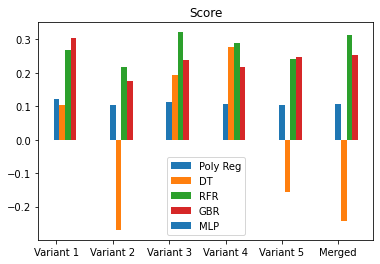

In [ ]:
plt.title("Score")
plt.bar(["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"], poly_data['Score'], width = 0.1, label = 'Poly Reg')
plt.bar(np.arange(len(tree_data['Score'])) + 0.1, tree_data['Score'], width = 0.1, label = 'DT')
plt.bar(np.arange(len(rfr_data['Score'])) + 0.2, rfr_data['Score'], width = 0.1, label = 'RFR')
plt.bar(np.arange(len(gbr_data['Score'])) + 0.3, gbr_data['Score'], width = 0.1, label = 'GBR')
plt.bar(np.arange(len(mlp_data['Score'])) + 0.4, mlp_data['Score'], width = 0.1, label = 'MLP')

plt.legend()
plt.show()

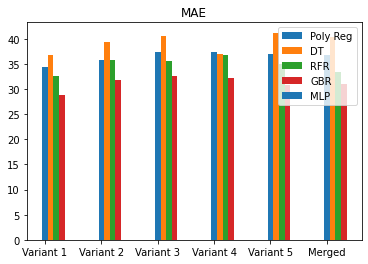

In [ ]:
plt.title("MAE")
plt.bar(["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"], list(poly_df["Mean Absolute Error"]), width = 0.1, label = 'Poly Reg')
plt.bar(np.arange(len(list(tree_df["Mean Absolute Error"]))) + 0.1, list(tree_df["Mean Absolute Error"]), width = 0.1, label = 'DT')
plt.bar(np.arange(len(rfr_data['Mean Absolute Error'])) + 0.2, rfr_data['Mean Absolute Error'], width = 0.1, label = 'RFR')
plt.bar(np.arange(len(gbr_data['Mean Absolute Error'])) + 0.3, gbr_data['Mean Absolute Error'], width = 0.1, label = 'GBR')
plt.bar(np.arange(len(mlp_data['Mean Absolute Error'])) + 0.4, mlp_data['Mean Absolute Error'], width = 0.1, label = 'MLP')

plt.legend()
plt.show()

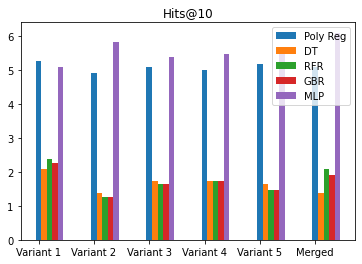

In [ ]:
plt.title("Hits@10")
plt.bar(["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"], poly_hits_data['Hits@10'], width = 0.1, label = 'Poly Reg')
plt.bar(np.arange(len(tree_hits_data['Hits@10'])) + 0.1, tree_hits_data['Hits@10'], width = 0.1, label = 'DT')
plt.bar(np.arange(len(rfr_hits_data['Hits@10'])) + 0.2, rfr_hits_data['Hits@10'], width = 0.1, label = 'RFR')
plt.bar(np.arange(len(gbr_hits_data['Hits@10'])) + 0.3, gbr_hits_data['Hits@10'], width = 0.1, label = 'GBR')
plt.bar(np.arange(len(mlp_hits_data['Hits@10'])) + 0.4, mlp_hits_data['Hits@10'], width = 0.1, label = 'MLP')

plt.legend()
plt.show()

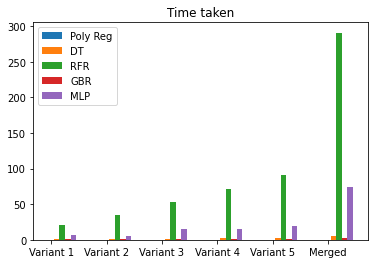

In [ ]:
plt.title("Time taken")
plt.bar(["Variant 1", "Variant 2", "Variant 3", "Variant 4", "Variant 5", "Merged"], list(poly_df["Time Taken"]), width = 0.1, label = 'Poly Reg')
plt.bar(np.arange(len(list(tree_df["Time Taken"]))) + 0.1, list(tree_df["Time Taken"]), width = 0.1, label = 'DT')
plt.bar(np.arange(len(rfr_data['Time Taken'])) + 0.2, rfr_data['Time Taken'], width = 0.1, label = 'RFR')
plt.bar(np.arange(len(gbr_data['Time Taken'])) + 0.3, gbr_data['Time Taken'], width = 0.1, label = 'GBR')
plt.bar(np.arange(len(mlp_data['Time Taken'])) + 0.4, mlp_data['Time Taken'], width = 0.1, label = 'MLP')

plt.legend()
plt.show()

# Methods

1. log target variable
2. sqrt target variable
3. boxcox target variable

If the model used `target+1` remember to -1 aft prediction.

Imputation of target not used since imputation is more for missing values.

Since the 0s are true values (not due to sensitivity of instruments, or no data), can consider a mixture of models. Part of the model determines the probability of 0, the other part determines the distribution of the data when it is positive.
* See: https://robjhyndman.com/hyndsight/transformations/

Use generalized linear models to predict targets that arent normally distributed?
* GammaRegressor - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.GammaRegressor.html
* PoissonRegressor
* TweedieRegressor

In [ ]:
n_bins = 50

0.21490543026231976


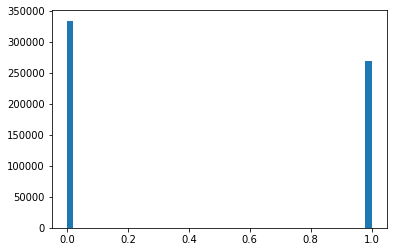

In [ ]:
print(merged_df["target"].skew())

plt.hist(merged_df["target"], bins=n_bins);

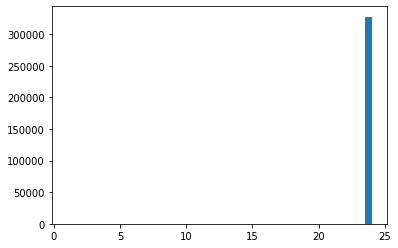

In [ ]:
h_loc_0 = merged_df["h_local"][merged_df["target"] == 0]
plt.hist(h_loc_0, bins=n_bins);

In [ ]:
test = merged_df["target"].apply(lambda x: 1 if x != 0 else 0)

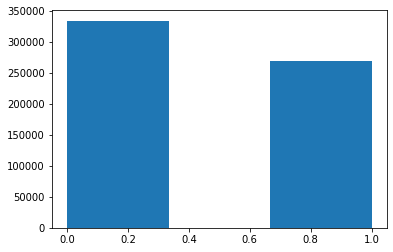

In [ ]:
plt.hist(test, bins=3);

In [ ]:
merged_df["target2"] = merged_df["target"].apply(lambda x: x+1)
merged_df["target3"] = merged_df["target"].apply(lambda x: 0.0001 if x == 0 else x)

0.21490543026231973


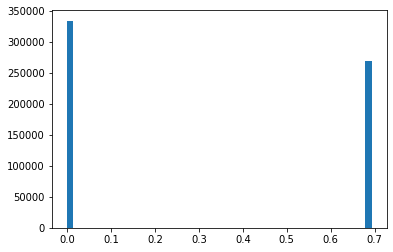

In [ ]:
target_log = np.log(merged_df["target2"])
print(target_log.skew())

plt.hist(target_log, bins=n_bins);

0.21490543026231976


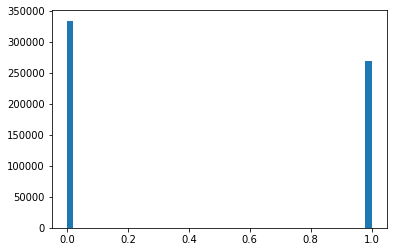

In [ ]:
target_sqrt = np.sqrt(merged_df["target"])
print(target_sqrt.skew())

plt.hist(target_sqrt, bins=n_bins);

In [ ]:
from scipy import stats

0.21490543026232


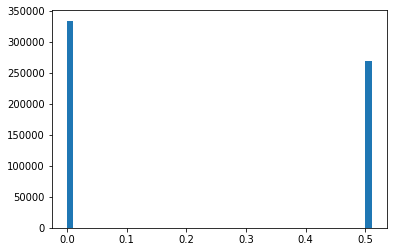

In [ ]:
target_bc = stats.boxcox(merged_df["target2"])[0]
target_bc = pd.Series(target_bc)
print(target_bc.skew())

plt.hist(target_bc, bins=n_bins);